# IT Academy - Data Science with Python
## S13 T01: Supervised Classification
### [Github Supervised Classification](https://github.com/jesussantana/Supervised-Classification)

[![forthebadge made-with-python](http://ForTheBadge.com/images/badges/made-with-python.svg)](https://www.python.org/)  
[![Made withJupyter](https://img.shields.io/badge/Made%20with-Jupyter-orange?style=for-the-badge&logo=Jupyter)](https://jupyter.org/try)  
[![wakatime](https://wakatime.com/badge/github/jesussantana/Supervised-Classification.svg)](https://wakatime.com/badge/github/jesussantana/Supervised-Classification)

In [1]:
#%pip install lazypredict

In [2]:
# Data treatment
# ==============================================================================
import json
import numpy as np
import pandas as pd
from pandas import json_normalize
from datetime import datetime
from tabulate import tabulate
import missingno as msno

# # Graphics
# ==============================================================================
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
from matplotlib import style
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
from PIL import Image
from IPython.display import Image
#from ggplot import *

# Auto-training of classification and regression models
# ==============================================================================
### import more dependencies in one line
import pyforest

### importing lazypredict library
import lazypredict
from lazypredict.Supervised import LazyRegressor, LazyClassifier

# Preprocessing and modeling
# ==============================================================================
import statsmodels.api as sm
import statsmodels.formula.api as smf
from statsmodels.formula.api import ols

from scipy import stats
from scipy.stats import ttest_1samp,ttest_ind
from scipy.stats import normaltest
from scipy.stats import f_oneway
from scipy.stats import randint
from scipy.stats.mstats import gmean,hmean
from scipy.stats import loguniform

from imblearn.over_sampling import SMOTE

from sklearn.pipeline import Pipeline

from sklearn.compose import ColumnTransformer, make_column_selector

from sklearn.impute import SimpleImputer

from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import QuantileTransformer
from sklearn.preprocessing import PowerTransformer
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import MaxAbsScaler
from sklearn.preprocessing import PolynomialFeatures

from sklearn.feature_selection import RFECV, SelectKBest, f_regression, f_classif 

from sklearn import metrics
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error, euclidean_distances
from sklearn.metrics import accuracy_score, confusion_matrix, roc_auc_score, recall_score, plot_confusion_matrix
from sklearn.metrics import precision_score, f1_score, classification_report, balanced_accuracy_score

from sklearn.inspection import permutation_importance

from sklearn.decomposition import PCA

from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RepeatedKFold

from sklearn.linear_model import LinearRegression, Ridge, ElasticNet, SGDRegressor, LogisticRegression

from sklearn.neighbors import KNeighborsRegressor
from sklearn.neighbors import KNeighborsClassifier

from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import DecisionTreeRegressor

from xgboost import XGBClassifier

from sklearn.svm import LinearSVC, SVC

from sklearn.datasets import make_blobs

from sklearn.ensemble import RandomForestRegressor 
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier


from skopt import gp_minimize
from skopt.space import Real, Integer
from skopt.utils import use_named_args
from skopt.plots import plot_convergence

# Paralllel Processing
# ==============================================================================
import multiprocessing
from joblib import Parallel, delayed, dump, load

# Various
# ==============================================================================
import time
import random as rd
from itertools import product
from fitter import Fitter, get_common_distributions

# Pandas configuration
# ==============================================================================
pd.set_option('display.max_columns', None)

# Matplotlib configuration
# ==============================================================================
plt.rcParams['image.cmap'] = "bwr"
#plt.rcParams['figure.dpi'] = "100"
plt.rcParams['savefig.bbox'] = "tight"
style.use('ggplot') or plt.style.use('ggplot')
%matplotlib inline

# Seaborn configuration
# ==============================================================================
sns.set_theme(style='darkgrid', palette='deep')
dims = (20, 16)

# Warnings configuration
# ==============================================================================
import warnings
warnings.filterwarnings('ignore')

# Folder configuration
# ==============================================================================
from os import path
import sys
new_path = '../scripts/'
if new_path not in sys.path:
    sys.path.append(new_path)

/home/jesus/.local/lib/python3.8/site-packages/sklearn/utils/deprecation.py:143: FutureWarning:

The sklearn.utils.testing module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.utils. Anything that cannot be imported from sklearn.utils is now part of the private API.



### Exercise 1: 
  - Create at least three different classification models to try to best predict DelayedFlights.csv flight delay (ArrDelay).

### Exercise 2: 
  - Creates a new variable depending on whether the flight arrived late or not (ArrDelay> 0).

### Exercise 3: 
  - Compare classification models using accuracy, a confidence matrix, and other more advanced metrics.

### Exercise 4: 
  - Train them using the different parameters they support.  

### Exercise 5: 
  - Compare your performance using the traint / test approach or using all data (internal validation).

### Exercise 5: 
  - Perform some variable engineering process to improve prediction.

### Exercise 6: 
  - Do not use the DepDelay variable when making predictions.

In [3]:
# Path folder configuration
# ===============================================================================

path = '../data/'
file = 'raw/DelayedFlights.csv'

df_raw = pd.read_csv(path+file)

In [4]:
df = df_raw.copy()

## Exploratory analysis

In [5]:
df.head()

,Unnamed: 0,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,FlightNum,TailNum,ActualElapsedTime,CRSElapsedTime,AirTime,ArrDelay,DepDelay,Origin,Dest,Distance,TaxiIn,TaxiOut,Cancelled,CancellationCode,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
0,0,2008,1,3,4,2003.00,1955,2211.00,2225,WN,335,N712SW,128.00,150.00,116.00,-14.00,8.00,IAD,TPA,810,4.00,8.00,0,N,0,nan,nan,nan,nan,nan
1,1,2008,1,3,4,754.00,735,1002.00,1000,WN,3231,N772SW,128.00,145.00,113.00,2.00,19.00,IAD,TPA,810,5.00,10.00,0,N,0,nan,nan,nan,nan,nan
2,2,2008,1,3,4,628.00,620,804.00,750,WN,448,N428WN,96.00,90.00,76.00,14.00,8.00,IND,BWI,515,3.00,17.00,0,N,0,nan,nan,nan,nan,nan
3,4,2008,1,3,4,1829.00,1755,1959.00,1925,WN,3920,N464WN,90.00,90.00,77.00,34.00,34.00,IND,BWI,515,3.00,10.00,0,N,0,2.00,0.00,0.00,0.00,32.00
4,5,2008,1,3,4,1940.00,1915,2121.00,2110,WN,378,N726SW,101.00,115.00,87.00,11.00,25.00,IND,JAX,688,4.00,10.00,0,N,0,nan,nan,nan,nan,nan


In [6]:
df = df_raw.drop(labels='Unnamed: 0', axis=1)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1936758 entries, 0 to 1936757
Data columns (total 29 columns):
 #   Column             Dtype  
---  ------             -----  
 0   Year               int64  
 1   Month              int64  
 2   DayofMonth         int64  
 3   DayOfWeek          int64  
 4   DepTime            float64
 5   CRSDepTime         int64  
 6   ArrTime            float64
 7   CRSArrTime         int64  
 8   UniqueCarrier      object 
 9   FlightNum          int64  
 10  TailNum            object 
 11  ActualElapsedTime  float64
 12  CRSElapsedTime     float64
 13  AirTime            float64
 14  ArrDelay           float64
 15  DepDelay           float64
 16  Origin             object 
 17  Dest               object 
 18  Distance           int64  
 19  TaxiIn             float64
 20  TaxiOut            float64
 21  Cancelled          int64  
 22  CancellationCode   object 
 23  Diverted           int64  
 24  CarrierDelay       float64
 25  WeatherDelay      

In [8]:
df.shape

(1936758, 29)

In [9]:
type(df)

pandas.core.frame.DataFrame

In [10]:
df.isna().sum().sort_values()

Year                      0
Month                     0
DayofMonth                0
DayOfWeek                 0
DepTime                   0
CRSDepTime                0
Distance                  0
CRSArrTime                0
UniqueCarrier             0
FlightNum                 0
Dest                      0
Diverted                  0
Origin                    0
CancellationCode          0
Cancelled                 0
DepDelay                  0
TailNum                   5
CRSElapsedTime          198
TaxiOut                 455
TaxiIn                 7110
ArrTime                7110
ArrDelay               8387
AirTime                8387
ActualElapsedTime      8387
CarrierDelay         689270
WeatherDelay         689270
NASDelay             689270
SecurityDelay        689270
LateAircraftDelay    689270
dtype: int64

### Create a variable Target depending on whether the flight was late or not (ArrDelay> 0)

In [11]:
# 1 Means Delay, 0 Means no Delay
df['Target'] = df['ArrDelay'].apply(lambda x: 0 if x <=0 else 1)

In [12]:
df = df.drop(labels='ArrDelay', axis=1)

In [13]:
df.Target.value_counts(normalize=True).round(2)


1   0.89
0   0.11
Name: Target, dtype: float64

In [14]:
df.to_csv(path + "interim/DelayedFlights_Target.csv", index = False, header = True)

### Drop features that that they do not provide us with extra value

In [15]:
df.drop(axis=1,columns=['Year','Cancelled','CancellationCode','TailNum','FlightNum','CRSElapsedTime','ActualElapsedTime','TaxiIn','TaxiOut','Diverted','CarrierDelay','WeatherDelay','NASDelay','SecurityDelay','LateAircraftDelay'], inplace=True)

In [16]:
df.to_csv(path + "interim/DelayedFlights_Target_drop_var.csv", index = False, header = True)

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1936758 entries, 0 to 1936757
Data columns (total 14 columns):
 #   Column         Dtype  
---  ------         -----  
 0   Month          int64  
 1   DayofMonth     int64  
 2   DayOfWeek      int64  
 3   DepTime        float64
 4   CRSDepTime     int64  
 5   ArrTime        float64
 6   CRSArrTime     int64  
 7   UniqueCarrier  object 
 8   AirTime        float64
 9   DepDelay       float64
 10  Origin         object 
 11  Dest           object 
 12  Distance       int64  
 13  Target         int64  
dtypes: float64(4), int64(7), object(3)
memory usage: 206.9+ MB


In [18]:
df.shape

(1936758, 14)

In [19]:
df.isna().sum()

Month               0
DayofMonth          0
DayOfWeek           0
DepTime             0
CRSDepTime          0
ArrTime          7110
CRSArrTime          0
UniqueCarrier       0
AirTime          8387
DepDelay            0
Origin              0
Dest                0
Distance            0
Target              0
dtype: int64

### Data sampling to reduce loading time

In [20]:
df = df.sample(frac=0.005, random_state = 6858)

In [21]:
df.to_csv(path + "processed/DelayedFlights_Target_Sample.csv", index = False, header = True)

## Distribution of the Target variable

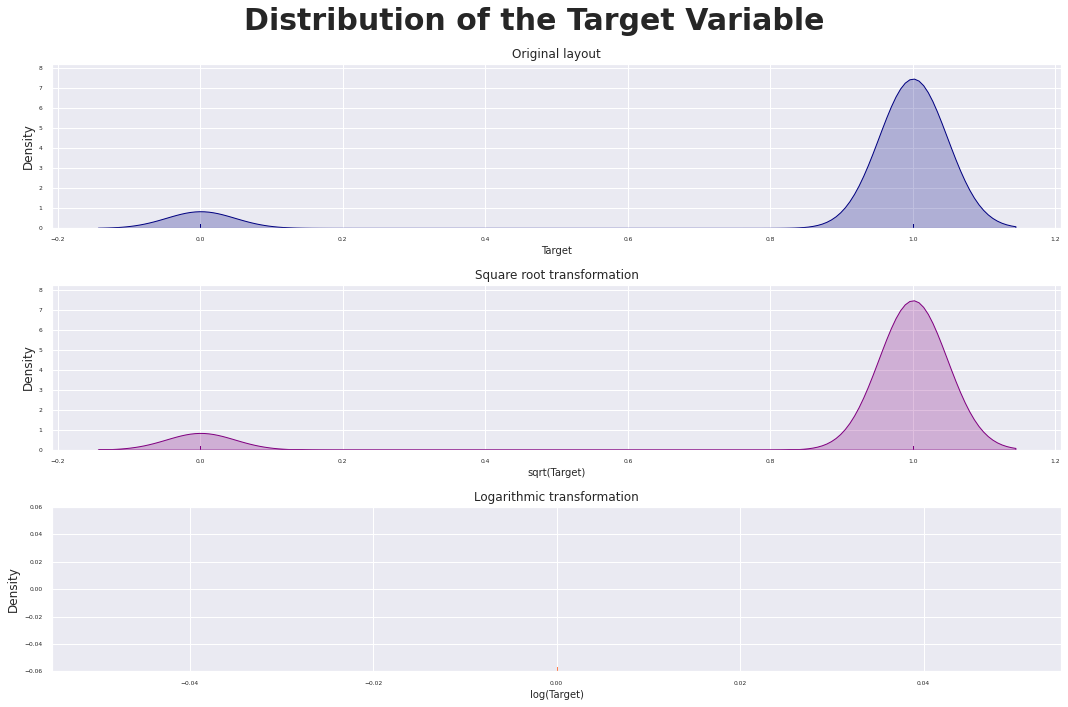

In [22]:
fig, axes = plt.subplots(nrows=3, ncols=1, figsize=(15, 10))
sns.distplot(
    df.Target,
    hist    = False,
    rug     = True,
    color   = "navy",
    kde_kws = {'shade': True, 'linewidth': 1},
    ax      = axes[0]
)
axes[0].set_title("Original layout", fontsize = 'medium')
axes[0].set_xlabel('Target', fontsize='small') 
axes[0].tick_params(labelsize = 6)

sns.distplot(
    np.sqrt(df.Target),
    hist    = False,
    rug     = True,
    color   = "purple",
    kde_kws = {'shade': True, 'linewidth': 1},
    ax      = axes[1]
)
axes[1].set_title("Square root transformation", fontsize = 'medium')
axes[1].set_xlabel('sqrt(Target)', fontsize='small') 
axes[1].tick_params(labelsize = 6)

sns.distplot(
    np.log(df.Target),
    hist    = False,
    rug     = True,
    color   = "coral",
    kde_kws = {'shade': True, 'linewidth': 1},
    ax      = axes[2]
)
axes[2].set_title("Logarithmic transformation", fontsize = 'medium')
axes[2].set_xlabel('log(Target)', fontsize='small') 
axes[2].tick_params(labelsize = 6)

fig.suptitle('Distribution of the Target Variable', fontsize = 30, fontweight = "bold")
fig.tight_layout()
plt.savefig("../reports/figures/Distribution_Target_Variable.png")

## Numerical variables

In [23]:
df.select_dtypes(include=['float64', 'int']).describe()

,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,AirTime,DepDelay,Distance,Target
count,9684.00,9684.00,9684.00,9684.00,9684.00,9649.00,9684.00,9646.00,9684.00,9684.00,9684.00
mean,6.09,15.72,4.01,1508.45,1457.75,1603.95,1624.08,107.94,43.54,762.67,0.90
std,3.49,8.71,1.98,451.31,425.95,545.60,465.04,68.23,55.93,573.52,0.30
min,1.00,1.00,1.00,1.00,10.00,1.00,1.00,7.00,6.00,31.00,0.00
25%,3.00,8.00,2.00,1156.00,1130.00,1316.00,1324.75,58.00,12.00,338.00,1.00
50%,6.00,16.00,4.00,1538.00,1500.00,1709.00,1658.00,90.00,24.00,605.00,1.00
75%,9.00,23.00,6.00,1853.00,1810.00,2025.00,2005.00,137.00,54.00,997.25,1.00
max,12.00,31.00,7.00,2400.00,2359.00,2400.00,2400.00,587.00,1369.00,4962.00,1.00


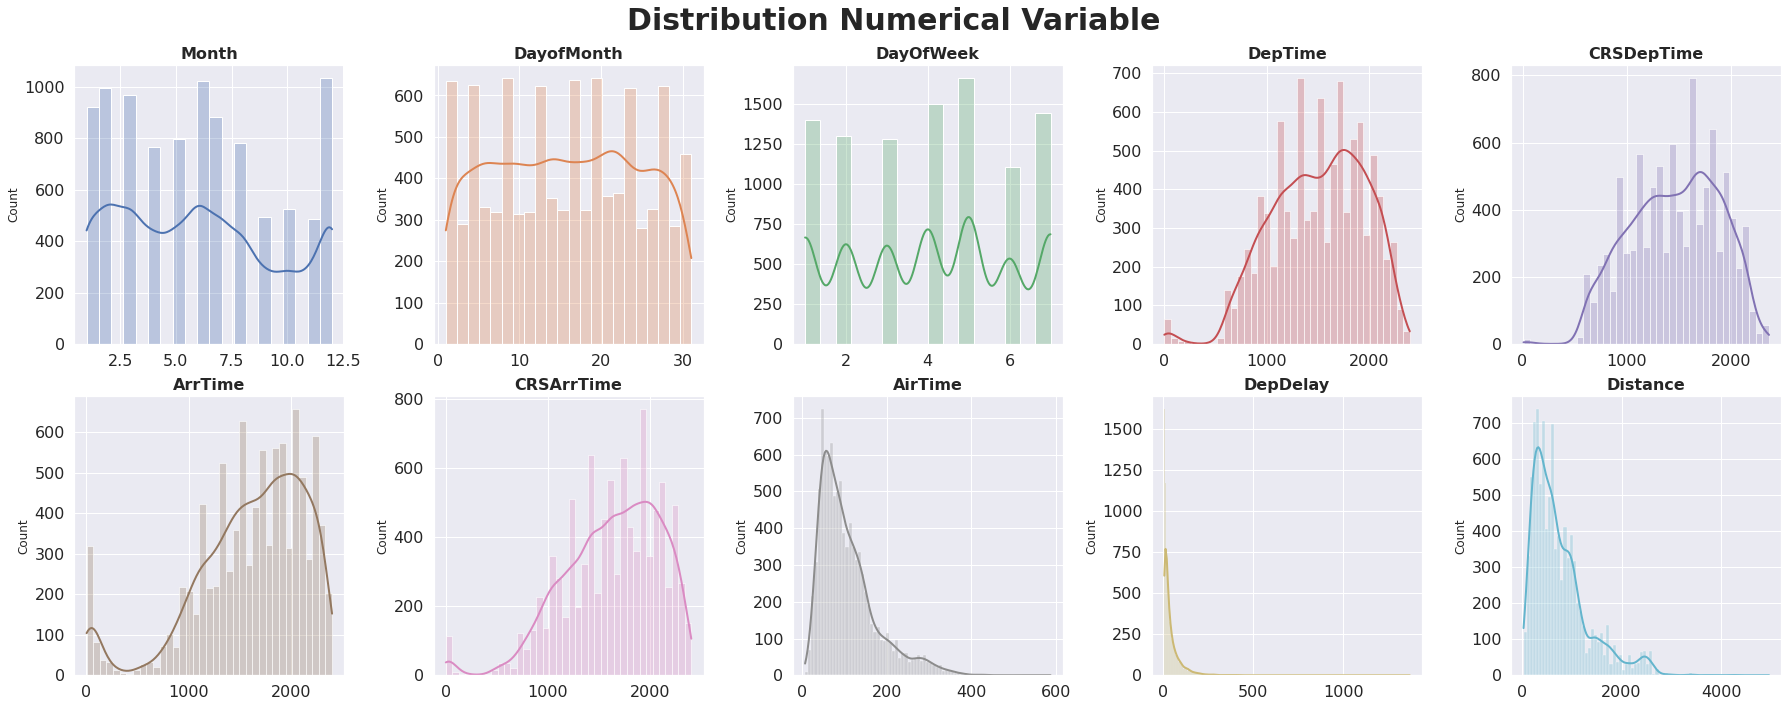

In [24]:
# Distribution graph for each numerical variable
# ==============================================================================
# Adjust number of subplots based on the number of columns

fig, axes = plt.subplots(ncols=5, nrows=2, figsize=(25, 10))
axes = axes.flat
columnas_numeric = df.select_dtypes(include=['float64', 'int']).columns
columnas_numeric = columnas_numeric.drop('Target')

for i, colum in enumerate(columnas_numeric):
    sns.histplot(
        data    = df,
        x       = colum,
        stat    = "count",
        kde     = True,
        color   = (list(plt.rcParams['axes.prop_cycle'])*2)[i]["color"],
        line_kws= {'linewidth': 2},
        alpha   = 0.3,
        ax      = axes[i]
    )
    axes[i].set_title(colum, fontsize = 16, fontweight = "bold")
    axes[i].tick_params(labelsize = 16)
    axes[i].set_xlabel("")
    
    
fig.tight_layout()
plt.subplots_adjust(top = 0.9)
fig.suptitle('Distribution Numerical Variable', fontsize = 30, fontweight = "bold")
plt.savefig("../reports/figures/Distribution_Numerical_Variable.png")

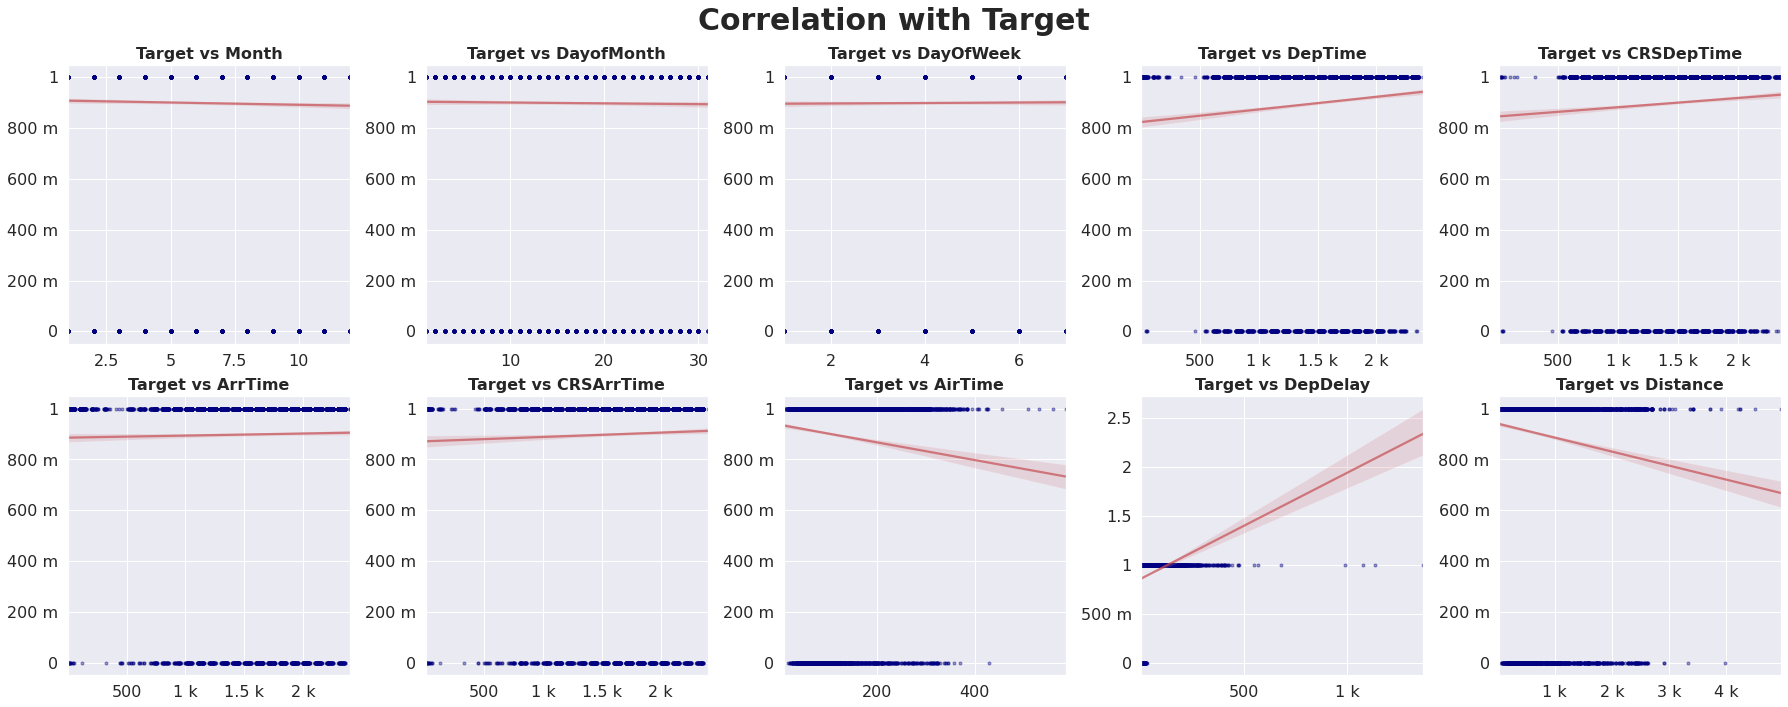

In [25]:
# Distribution graph for each numerical variable
# ==============================================================================
# Adjust number of subplots based on the number of columns
fig, axes = plt.subplots(ncols=5, nrows=2,  figsize=(25, 10))
axes = axes.flat
columnas_numeric = df.select_dtypes(include=['float64', 'int']).columns
columnas_numeric = columnas_numeric.drop('Target')

for i, colum in enumerate(columnas_numeric):
    sns.regplot(
        x           = df[colum],
        y           = df['Target'],
        color       = "navy",
        marker      = '.',
        scatter_kws = {"alpha":0.4},
        line_kws    = {"color":"r","alpha":0.7},
        ax          = axes[i]
    )
    axes[i].set_title(f"Target vs {colum}", fontsize = 16, fontweight = "bold")
    #axes[i].ticklabel_format(style='sci', scilimits=(-4,4), axis='both')
    axes[i].yaxis.set_major_formatter(ticker.EngFormatter())
    axes[i].xaxis.set_major_formatter(ticker.EngFormatter())
    axes[i].tick_params(labelsize = 16)
    axes[i].set_xlabel("")
    axes[i].set_ylabel("")

    #if (i-1 >= len(columnas_numeric)-1): break

# Se eliminan los axes vacíos
"""for i in [8]:
    fig.delaxes(axes[i])"""
    
fig.tight_layout()
plt.subplots_adjust(top=0.9)
fig.suptitle('Correlation with Target', fontsize = 30, fontweight = "bold")
plt.savefig("../reports/figures/Distribution_Each_Numerical_Variable.png")

## Numerical variables correlation

In [26]:
# Correlation between numeric columns
# ==============================================================================
def tidy_corr_matrix(corr_mat):
    
    # Function to convert a pandas correlation matrix to tidy format
    
    corr_mat = corr_mat.stack().reset_index()
    corr_mat.columns = ['variable_1','variable_2','r']
    corr_mat = corr_mat.loc[corr_mat['variable_1'] != corr_mat['variable_2'], :]
    corr_mat['abs_r'] = np.abs(corr_mat['r'])
    corr_mat = corr_mat.sort_values('abs_r', ascending=False)
    
    return corr_mat

corr_matrix = df.select_dtypes(include=['float64', 'int']).corr(method='pearson')

tidy_corr_matrix(corr_matrix).head(10)

,variable_1,variable_2,r,abs_r
106,Distance,AirTime,0.98,0.98
86,AirTime,Distance,0.98,0.98
37,DepTime,CRSDepTime,0.88,0.88
47,CRSDepTime,DepTime,0.88,0.88
39,DepTime,CRSArrTime,0.70,0.70
69,CRSArrTime,DepTime,0.70,0.70
70,CRSArrTime,CRSDepTime,0.70,0.70
50,CRSDepTime,CRSArrTime,0.70,0.70
61,ArrTime,CRSArrTime,0.64,0.64
71,CRSArrTime,ArrTime,0.64,0.64


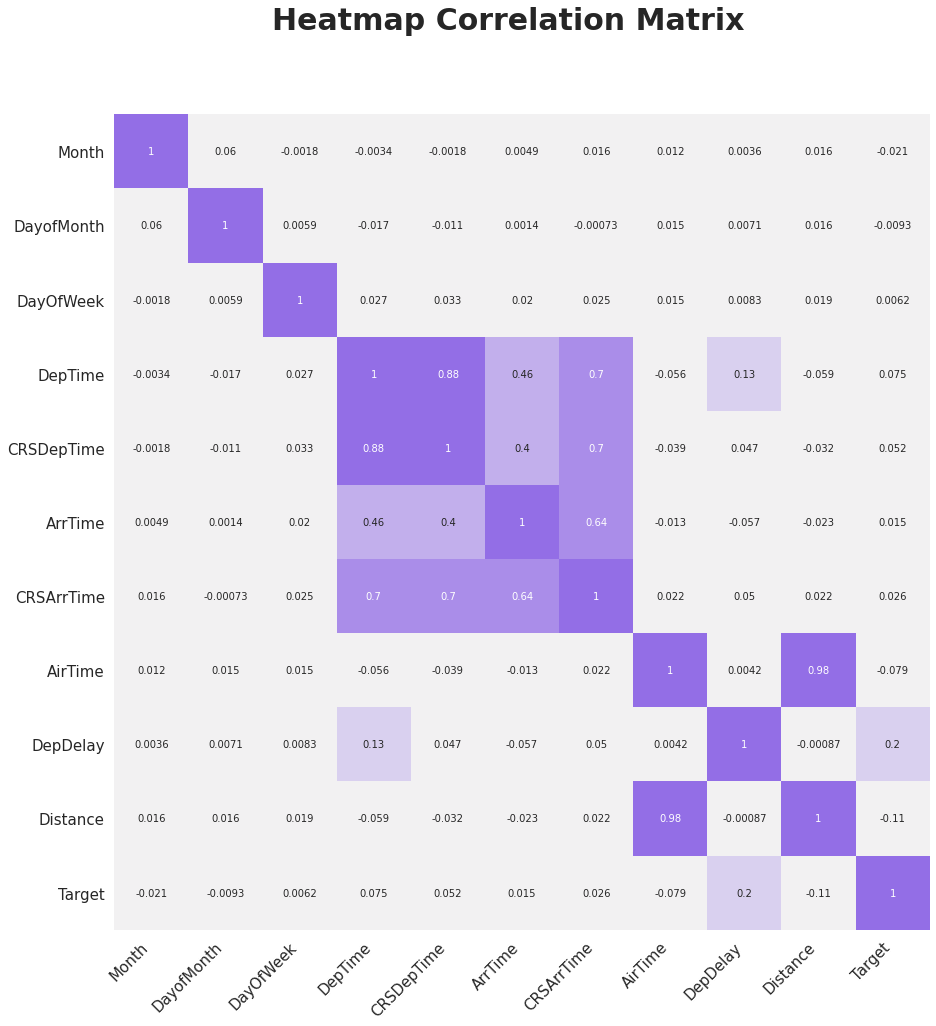

In [27]:
# Heatmap matrix of correlations
# ==============================================================================
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(15, 15))

sns.heatmap(
    corr_matrix,
    annot     = True,
    cbar      = False,
    annot_kws = {"size": 10},
    vmin      = -1,
    vmax      = 1,
    center    = 0,
    cmap      = sns.diverging_palette(150, 275, s=80, l=55, n=9),
    square    = True,
    ax        = ax
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation = 45,
    horizontalalignment = 'right',
)
ax.set_yticklabels(
    ax.get_yticklabels(),
    rotation = 0,
    horizontalalignment = 'right',
)
ax.tick_params(labelsize = 15)
fig.suptitle('Heatmap Correlation Matrix', fontsize = 30, fontweight = "bold")
plt.savefig("../reports/figures/Heatmap_Matrix_Correlations.png")

## Qualitative variables

In [28]:
# Qualitative variables (object type)
# ============================================================================
df.select_dtypes(include = ['object']).describe()

,UniqueCarrier,Origin,Dest
count,9684,9684,9684
unique,20,254,257
top,WN,ATL,ATL
freq,1833,628,557


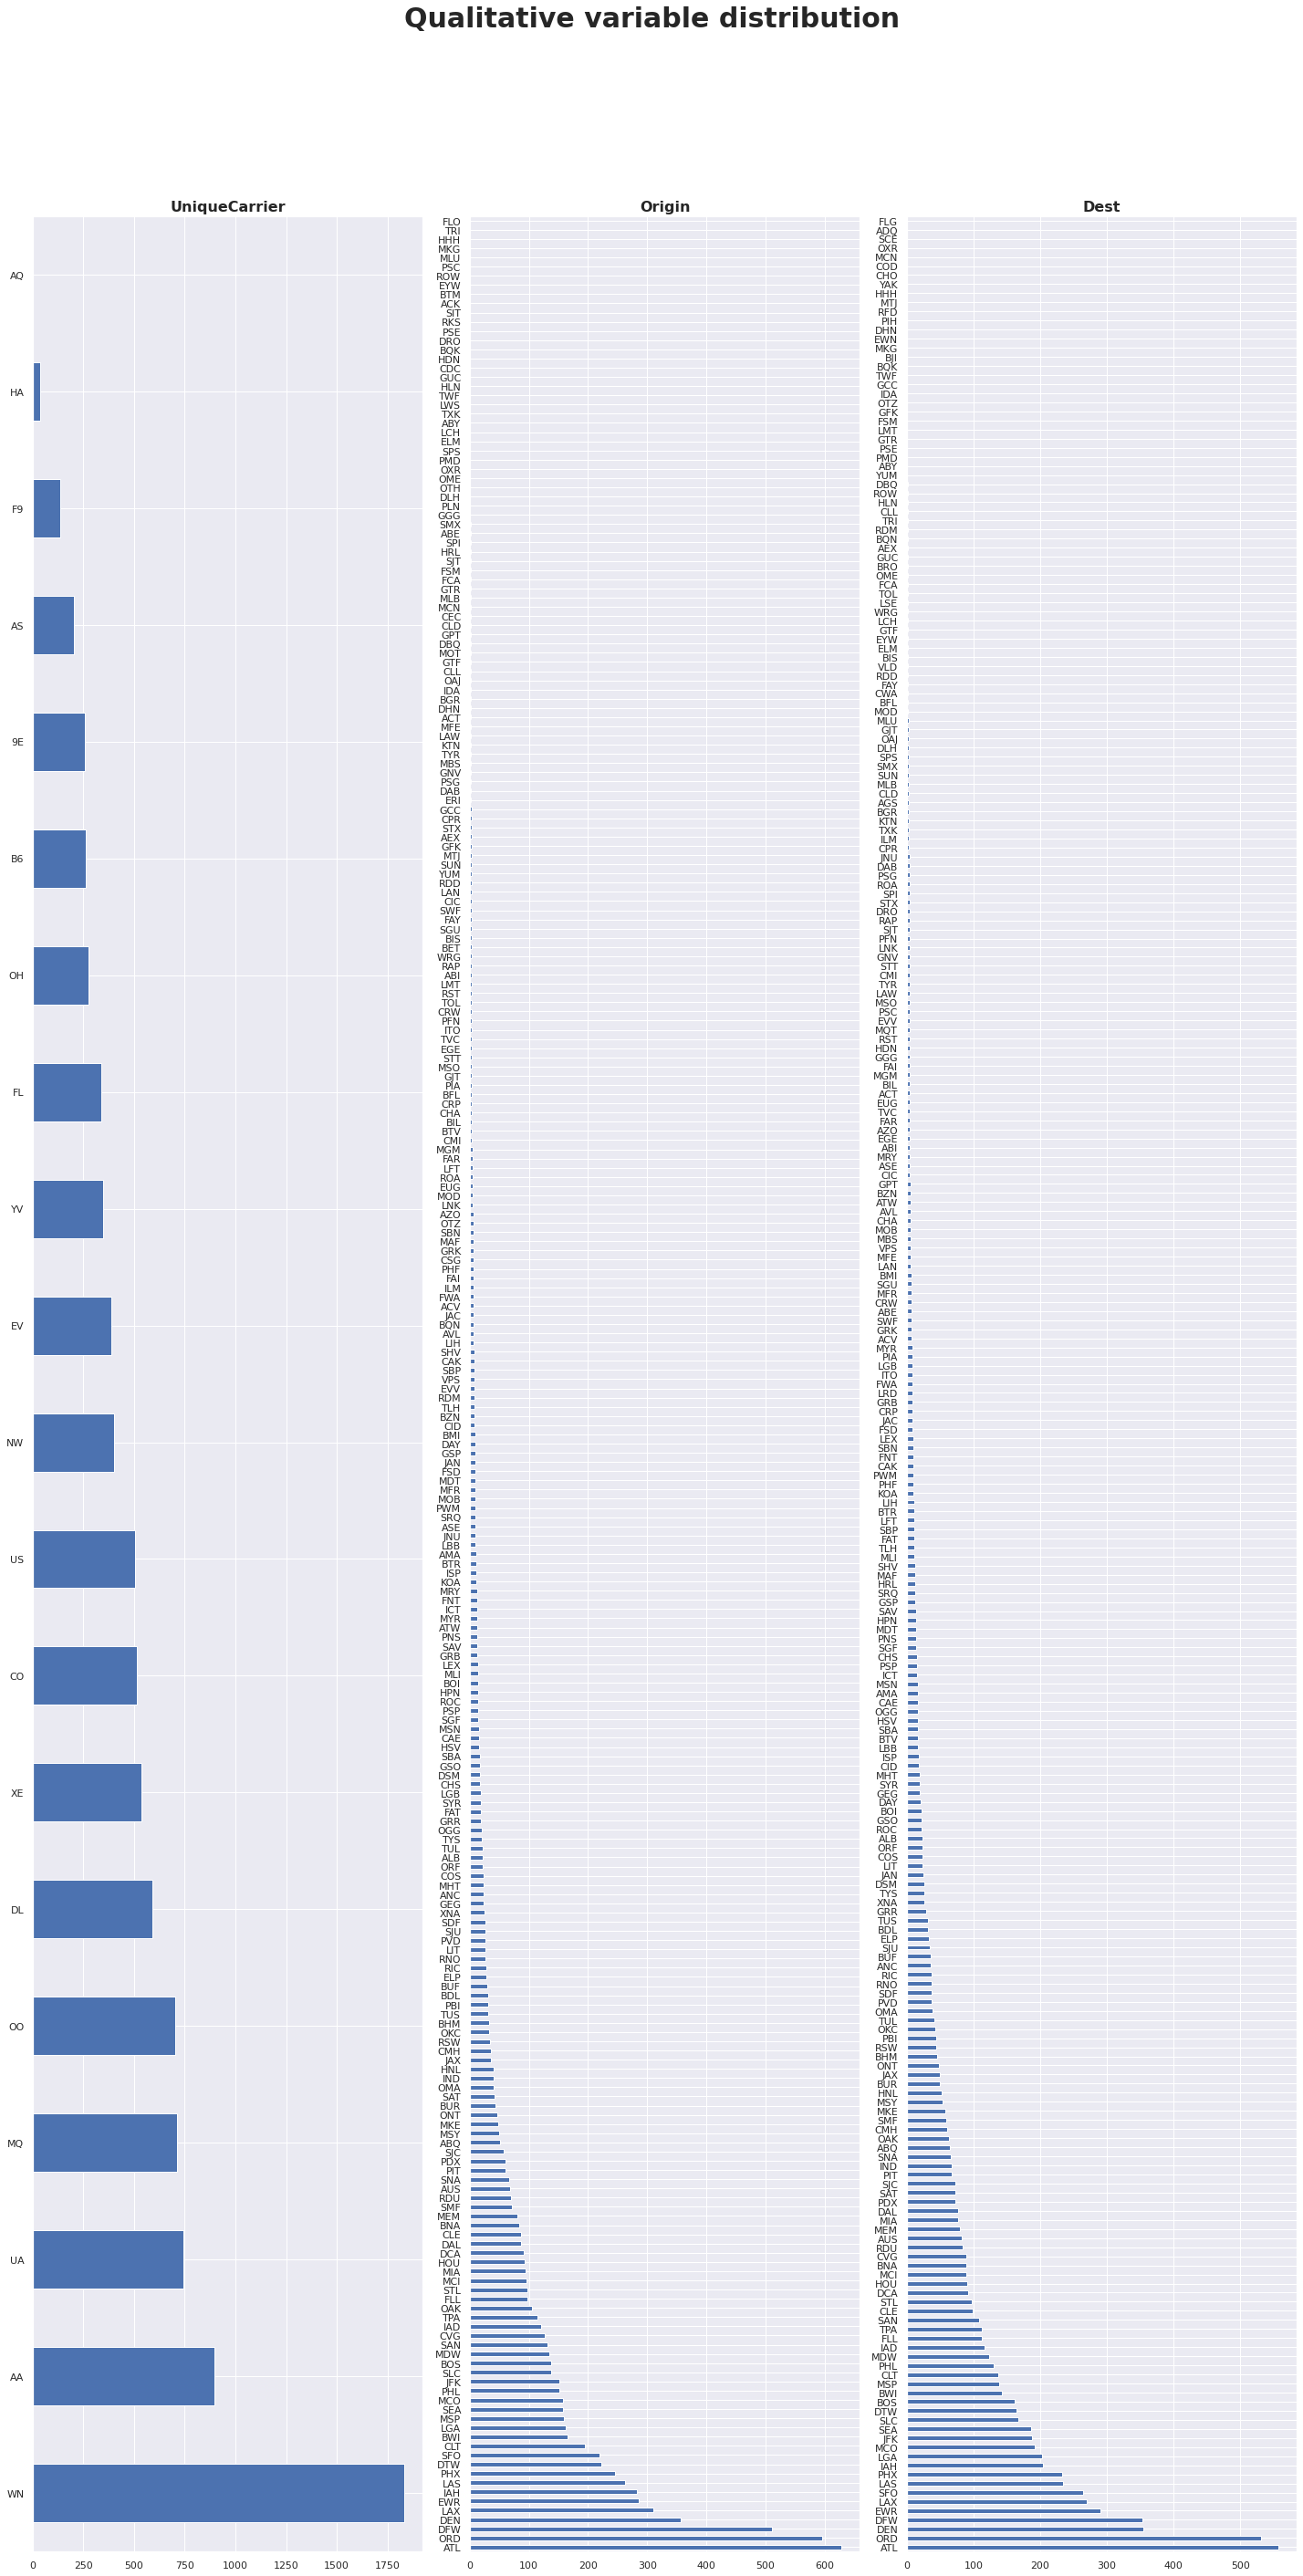

In [29]:
# Graph for each qualitative variable
# ==============================================================================
# Adjust number of subplots based on the number of columns
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(20, 40))
axes = axes.flat
columnas_object = df.select_dtypes(include=['object']).columns

for i, colum in enumerate(columnas_object):
    df[colum].value_counts().plot.barh(ax = axes[i])
    axes[i].set_title(colum, fontsize = 16, fontweight = "bold")
    axes[i].tick_params(labelsize = 11)
    axes[i].set_xlabel("")

# Empty axes are removed
"""for i in [7, 8]:
    fig.delaxes(axes[i])"""
    
fig.tight_layout()
plt.subplots_adjust(top=0.9)
fig.suptitle('Qualitative variable distribution',
             fontsize = 30, fontweight = "bold")
plt.savefig("../reports/figures/Each_Qualtitative_Variable.png")

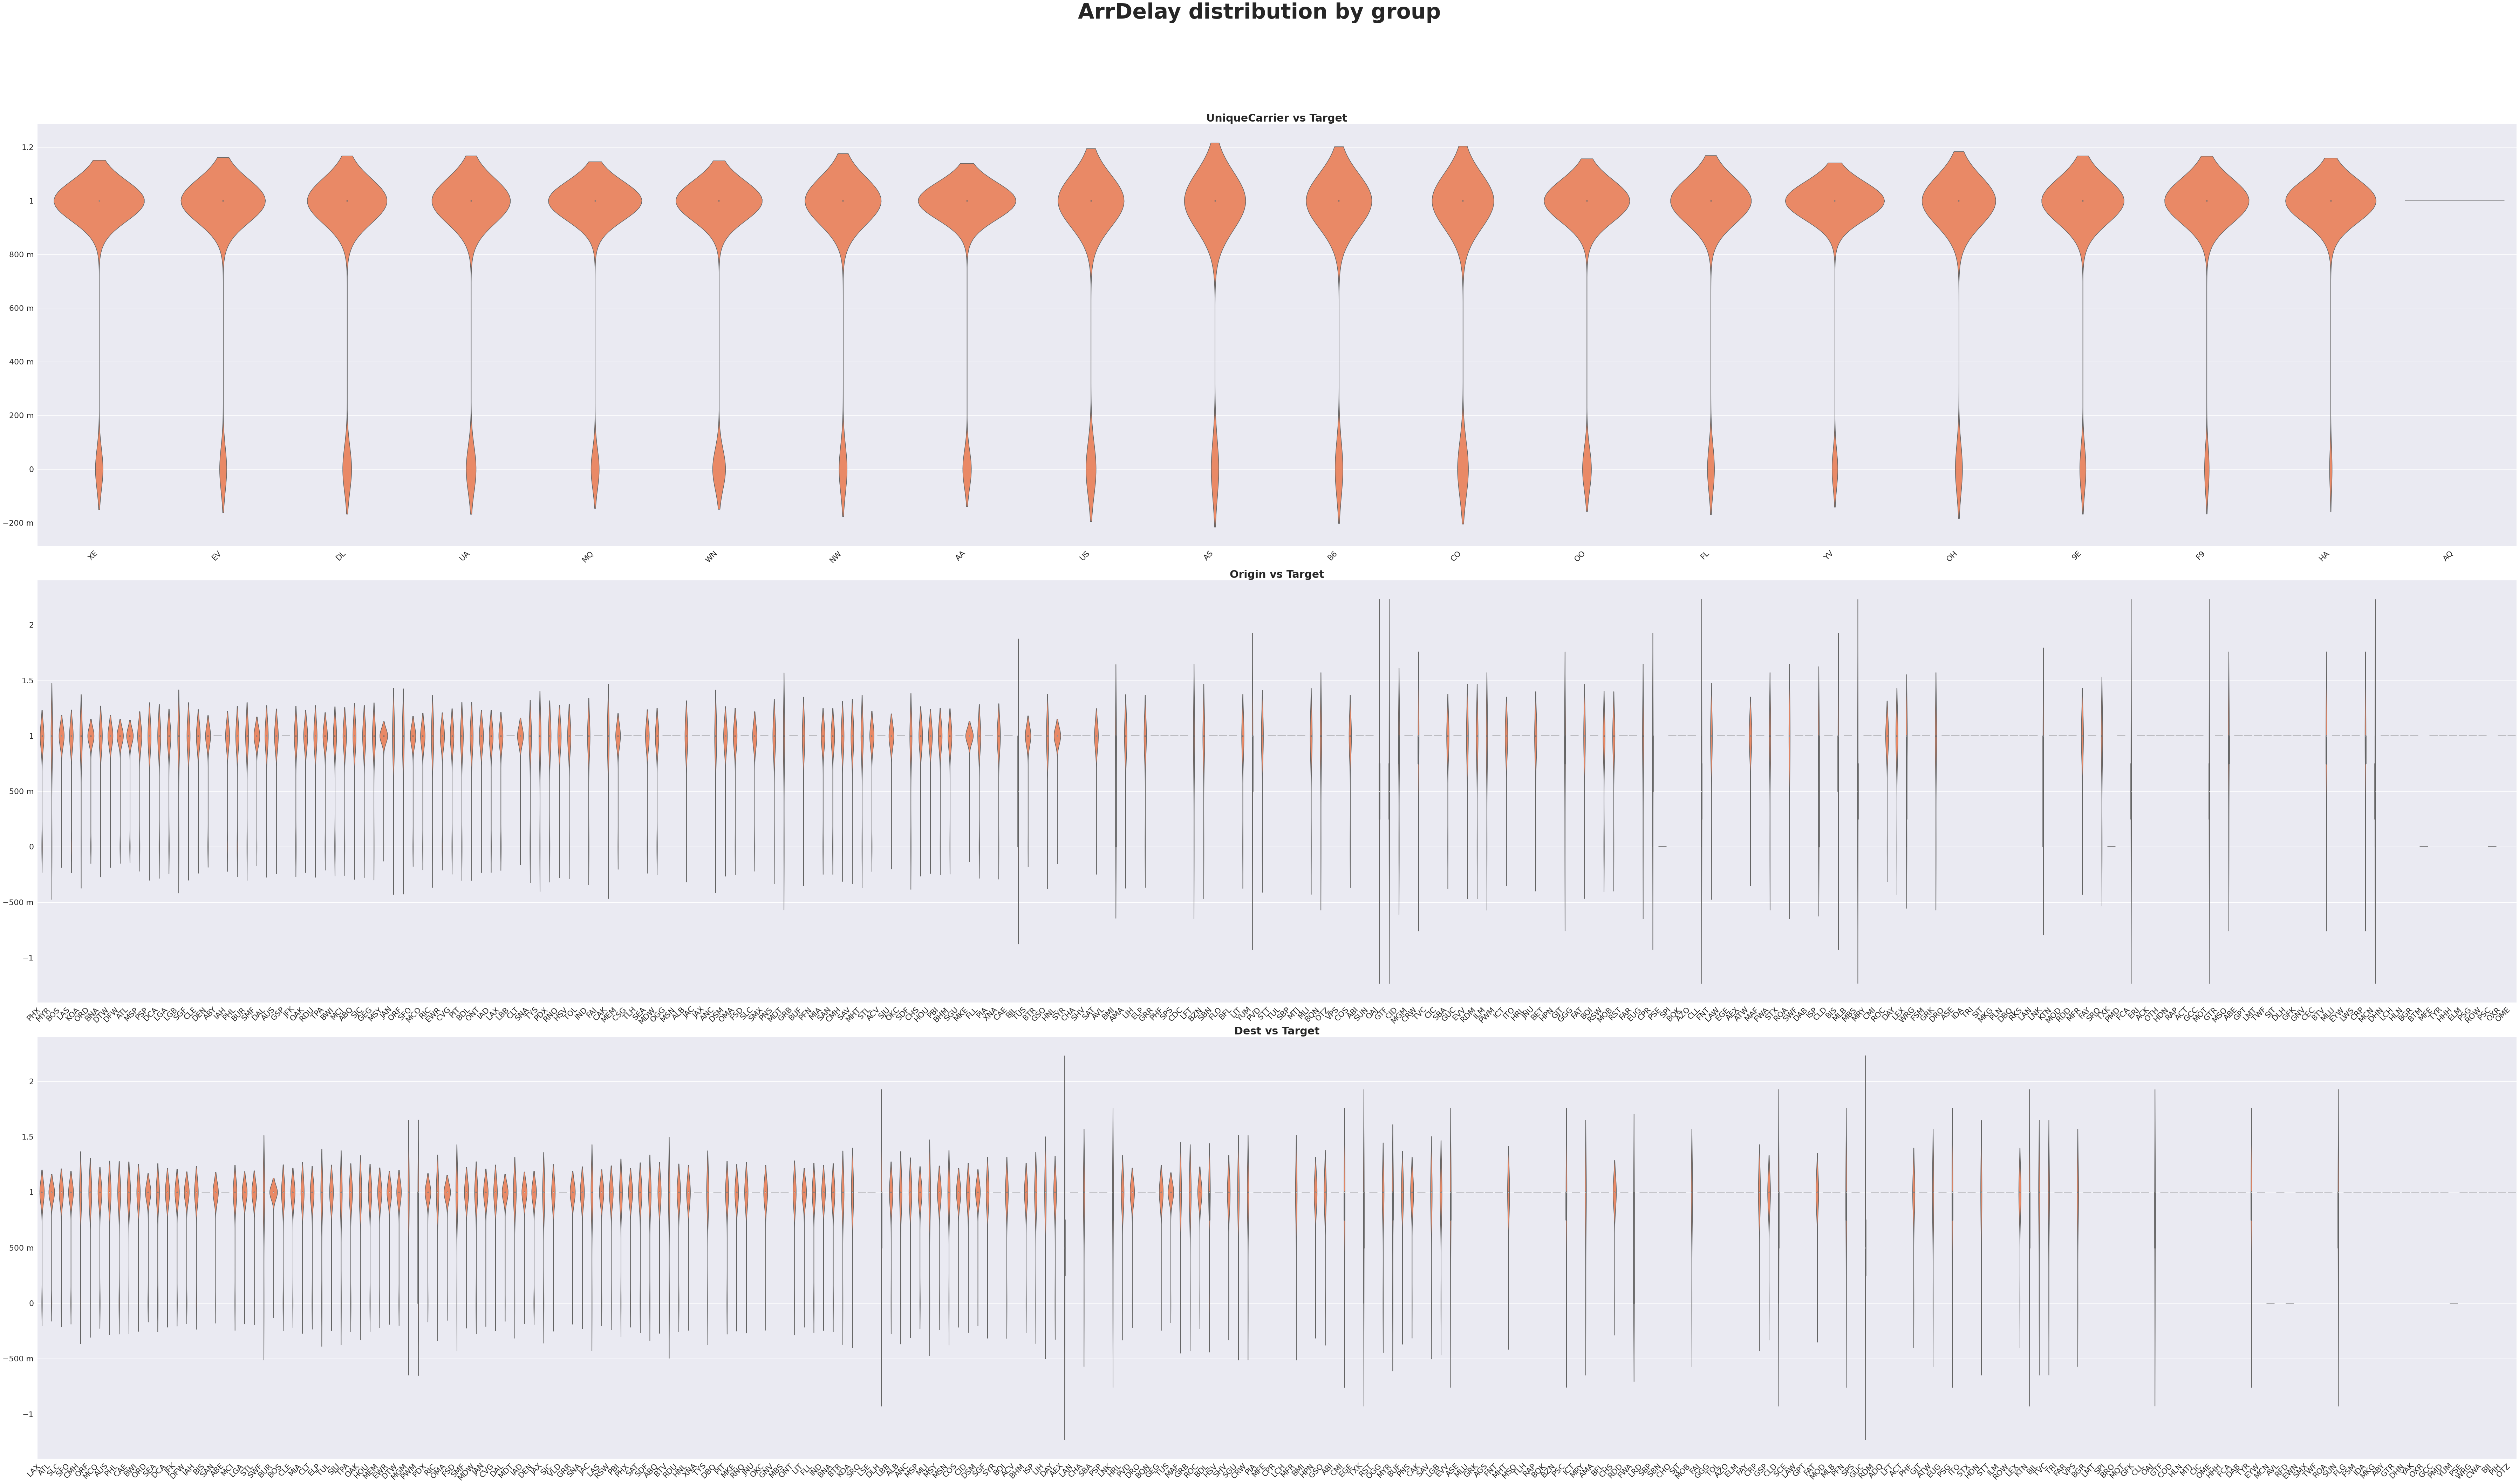

In [30]:
# Graph relationship between the ArrDelay and each qualitative variables
# ==============================================================================
# Adjust number of subplots based on the number of columns
fig, axes = plt.subplots(nrows=3, ncols=1, figsize=(100, 60))
axes = axes.flat
columnas_object = df.select_dtypes(include=['object']).columns

for i, colum in enumerate(columnas_object):
    sns.violinplot(
        x     = colum,
        y     = 'Target',
        data  = df,
        color = "coral",
        ax    = axes[i]
    )
    axes[i].set_title(f"{colum} vs Target", fontsize = 30, fontweight = "bold")
    axes[i].yaxis.set_major_formatter(ticker.EngFormatter())
    axes[i].tick_params(labelsize = 22)
    axes[i].set_xticklabels(axes[i].get_xticklabels(),rotation = 45, horizontalalignment = 'right')
    axes[i].set_xlabel("")
    axes[i].set_ylabel("")
    
# Empty axes are removed
"""for i in [7, 8]:
    fig.delaxes(axes[i])"""

fig.tight_layout()
plt.subplots_adjust(top=0.9)
fig.suptitle('ArrDelay distribution by group', fontsize = 60, fontweight = "bold")
plt.savefig("../reports/figures/Target_vs_Qualitative_Variable.png")

### Graph Pie chart's for each qualitative variables

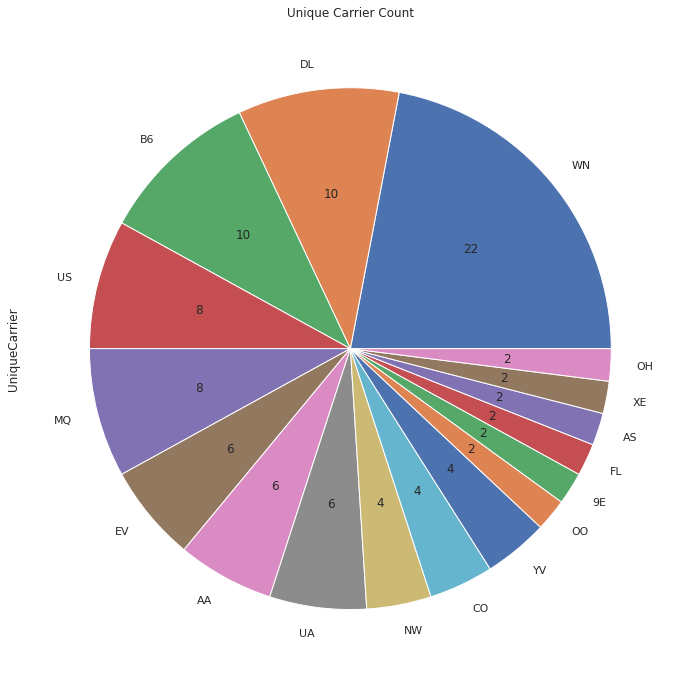

In [31]:
# Pie chart de UniqueCarrier
plot = df['UniqueCarrier'].head(50).value_counts().plot(kind='pie', autopct='%.0f', 
                                            figsize=(12, 12),
                                            title='Unique Carrier Count')

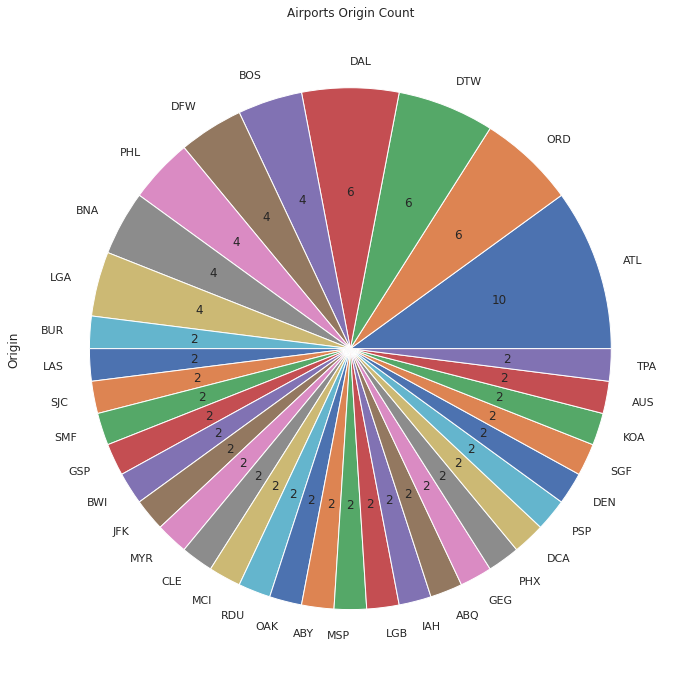

In [32]:
# Pie chart de Origin
plot = df['Origin'].head(50).value_counts().plot(kind='pie', autopct='%.0f', 
                                            figsize=(12, 12),
                                            title='Airports Origin Count')

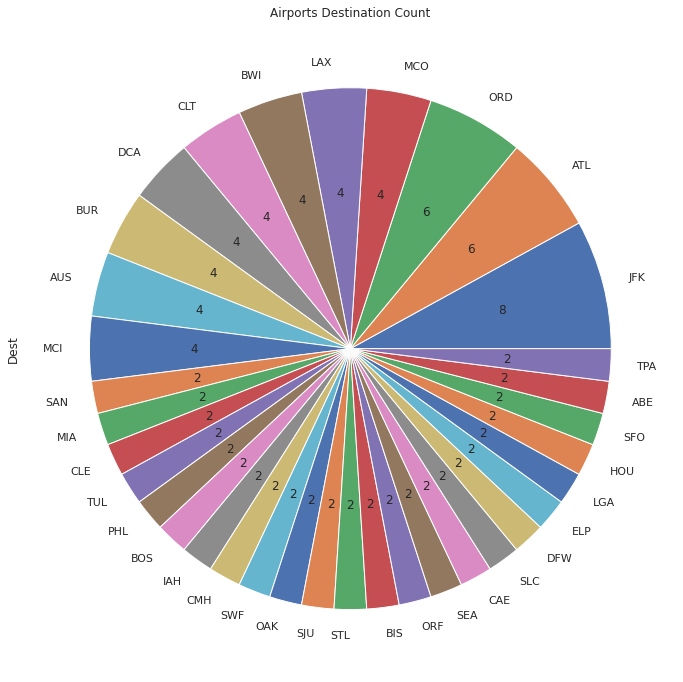

In [33]:
# Pie chart de Dest
plot = df['Dest'].head(50).value_counts().plot(kind='pie', autopct='%.0f', 
                                            figsize=(12, 12),
                                            title='Airports Destination Count')

## Transform Categorical Variables

In [34]:
# Ordinal encoding 
encoder = OrdinalEncoder()

df[['UniqueCarrier', 'Origin', 'Dest']]= encoder.fit_transform(df[['UniqueCarrier', 'Origin', 'Dest']])

In [35]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9684 entries, 32721 to 948541
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Month          9684 non-null   int64  
 1   DayofMonth     9684 non-null   int64  
 2   DayOfWeek      9684 non-null   int64  
 3   DepTime        9684 non-null   float64
 4   CRSDepTime     9684 non-null   int64  
 5   ArrTime        9649 non-null   float64
 6   CRSArrTime     9684 non-null   int64  
 7   UniqueCarrier  9684 non-null   float64
 8   AirTime        9646 non-null   float64
 9   DepDelay       9684 non-null   float64
 10  Origin         9684 non-null   float64
 11  Dest           9684 non-null   float64
 12  Distance       9684 non-null   int64  
 13  Target         9684 non-null   int64  
dtypes: float64(7), int64(7)
memory usage: 1.4 MB


## Missing values

In [36]:
df.isnull().sum().sum()

73

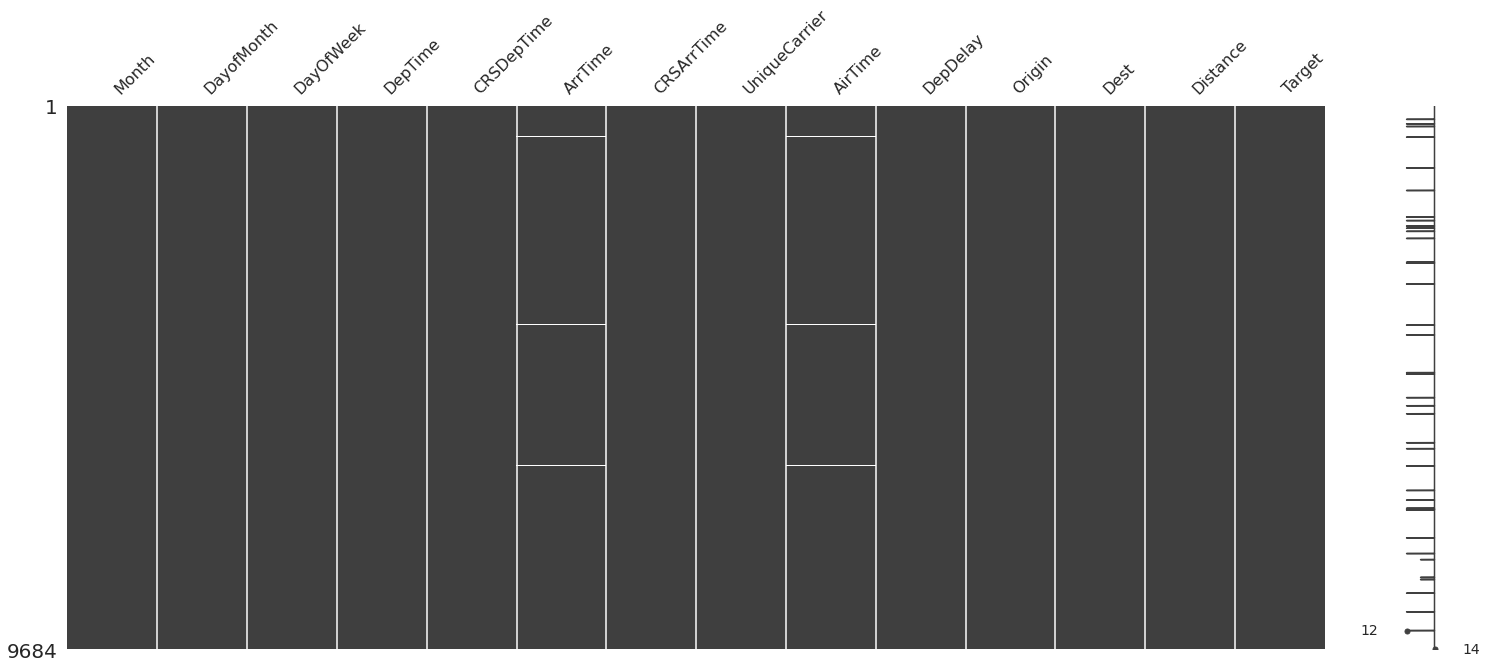

In [37]:
# Missing Values
msno.matrix(df);

In [38]:
# Script created for transform missing data
# ===============================================================================
import missing

In [39]:
df[:] = missing.transform(df[:])

In [40]:
df.replace([np.inf, -np.inf], np.nan, inplace=True)
df.dropna(inplace=True)

In [41]:
df.isnull().sum().sum()

0

In [42]:
df.isna().any()

Month            False
DayofMonth       False
DayOfWeek        False
DepTime          False
CRSDepTime       False
ArrTime          False
CRSArrTime       False
UniqueCarrier    False
AirTime          False
DepDelay         False
Origin           False
Dest             False
Distance         False
Target           False
dtype: bool

In [43]:
df.to_csv(path + "processed/DelayedFlightsProcessed.csv", index = False, header = True)

*****************************************************************************
*****************************************************************************
*****************************************************************************

## Divide the data set into training set and test set

In [44]:
df = pd.read_csv(path + 'processed/DelayedFlightsProcessed.csv')

In [45]:
# Matrix
X = df.drop(['Target'], axis = 'columns')
# Vector
y = df['Target']

In [46]:
# Call train_test_split on the data and capture the results
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 6858)

## Checking if the training set was correcly splitted

In [47]:
print("Training set - Features: ", X_train.shape, "Target: ", y_train.shape)
print("Test set - Features: ", X_test.shape, "Target: ",y_test.shape)

Training set - Features:  (7747, 13) Target:  (7747,)
Test set - Features:  (1937, 13) Target:  (1937,)


## Checking  Train, Test partition

In [48]:
print(">>>Train partition")
print("-----------------------")
print(y_train.describe())

>>>Train partition
-----------------------
count   7747.00
mean       0.90
std        0.30
min        0.00
25%        1.00
50%        1.00
75%        1.00
max        1.00
Name: Target, dtype: float64


In [49]:
print("Test partition")
print("-----------------------")
print(y_test.describe())

Test partition
-----------------------
count   1937.00
mean       0.90
std        0.31
min        0.00
25%        1.00
50%        1.00
75%        1.00
max        1.00
Name: Target, dtype: float64


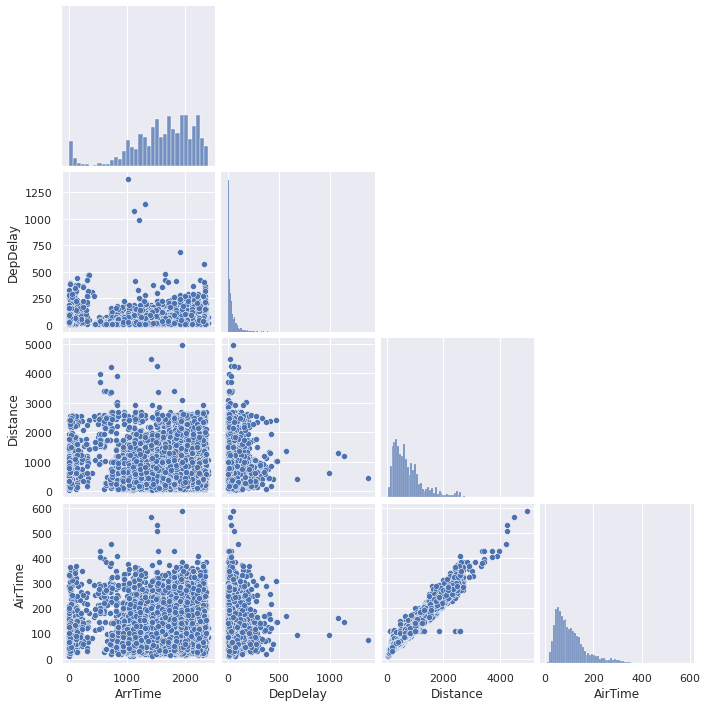

In [50]:
sns.pairplot(X_train[['ArrTime','DepDelay','Distance','AirTime']].round(3), corner=True)
plt.savefig("../reports/figures/train_pairplot.png")

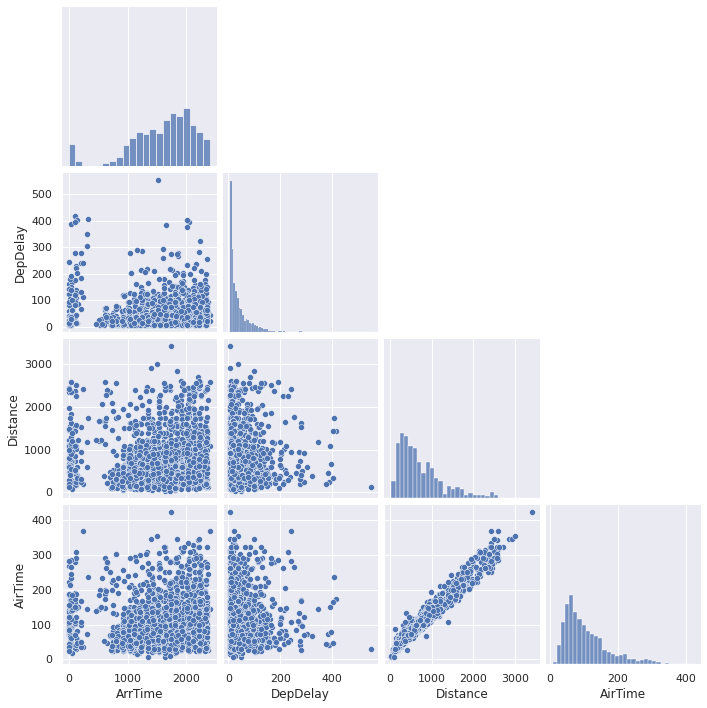

In [51]:
sns.pairplot(X_test[['ArrTime','DepDelay','Distance','AirTime']].round(3), corner=True)
plt.savefig("../reports/figures/test_pairplot.png")

In [52]:
X_train.to_csv(path + "interim/X_train.csv", index = False, header = True)
X_test.to_csv(path + "interim/X_test.csv", index = False, header = True)

# Automate fit and evaluate all the models with LazyClassifier

## Lazy Predict helps build a lot of basic models without much code and helps understand which models works better without any parameter tuning

https://lazypredict.readthedocs.io/en/latest/readme.html

In [53]:
# LazyClassifier Instance and fiting data

clf = LazyClassifier(verbose=0, ignore_warnings=True, custom_metric=None)

models,predictions = clf.fit(X_train, X_test, y_train, y_test)

100%|██████████| 29/29 [00:11<00:00,  2.48it/s]


### Check which model did better on the dataset

In [54]:
models

,Accuracy,Balanced Accuracy,ROC AUC,F1 Score,Time Taken
Model,,,,,
QuadraticDiscriminantAnalysis,0.67,0.81,0.81,0.73,0.02
GaussianNB,0.80,0.75,0.75,0.83,0.03
XGBClassifier,0.91,0.68,0.68,0.90,0.21
NearestCentroid,0.64,0.67,0.67,0.71,0.02
LGBMClassifier,0.91,0.66,0.66,0.90,0.11
DecisionTreeClassifier,0.85,0.63,0.63,0.85,0.08
BaggingClassifier,0.89,0.63,0.63,0.88,0.32
Perceptron,0.88,0.62,0.62,0.87,0.03
PassiveAggressiveClassifier,0.88,0.60,0.60,0.87,0.03


## Analize Classifier Function

In [55]:
def analize_models(model, name, X_train, X_test, y_train, y_test):
    
    model.fit(X_train,y_train)    
    y_pred = model.predict(X_test)
    conf_matrix = confusion_matrix(y_test,y_pred,normalize='true')

    scores = {'model': str(name),
            'Accuracy':accuracy_score(y_test,y_pred),
            'B-Accuracy':balanced_accuracy_score(y_test,y_pred),
            'Roc_AUC':roc_auc_score(y_test,y_pred),
            'F1 Score':f1_score(y_test,y_pred),
            'Precision':precision_score(y_test,y_pred),
            'Recall':recall_score(y_test,y_pred)}

    print(model)
    print('')
    print(f'Accuracy : {accuracy_score(y_test,y_pred)}')
    print(f'B-Accuracy :{balanced_accuracy_score(y_test,y_pred)}')
    print(f'ROC - AUC : {roc_auc_score(y_test,y_pred)}')
    print(f'F1 Score : {f1_score(y_test,y_pred)}')
    print(f'Precision : {precision_score(y_test,y_pred)}')
    print(f'Recall : {recall_score(y_test,y_pred)}')
    print('')
    print(conf_matrix)
    print('')

    plot_confusion_matrix(model, X_test, y_test, normalize='true')
    

    return scores

In [56]:
models.head(15).sort_values(by='ROC AUC', ascending=False)

,Accuracy,Balanced Accuracy,ROC AUC,F1 Score,Time Taken
Model,,,,,
QuadraticDiscriminantAnalysis,0.67,0.81,0.81,0.73,0.02
GaussianNB,0.80,0.75,0.75,0.83,0.03
XGBClassifier,0.91,0.68,0.68,0.90,0.21
NearestCentroid,0.64,0.67,0.67,0.71,0.02
LGBMClassifier,0.91,0.66,0.66,0.90,0.11
DecisionTreeClassifier,0.85,0.63,0.63,0.85,0.08
BaggingClassifier,0.89,0.63,0.63,0.88,0.32
Perceptron,0.88,0.62,0.62,0.87,0.03
PassiveAggressiveClassifier,0.88,0.60,0.60,0.87,0.03


## Classifier Models

In [57]:
XGBClass = XGBClassifier()
RandomForest = RandomForestClassifier()
LogReg = LogisticRegression()
DecissionTree = DecisionTreeClassifier()

### XGBClassifier

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=0, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

Accuracy : 0.9148167268972638
B-Accuracy :0.6784094976733086
ROC - AUC : 0.6784094976733086
F1 Score : 0.9535864978902953
Precision : 0.9308072487644151
Recall : 0.9775086505190311

[[0.37931034 0.62068966]
 [0.02249135 0.97750865]]



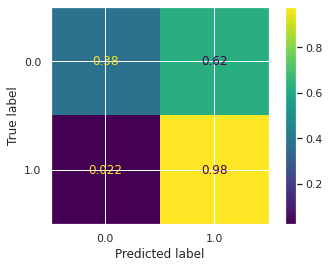

In [58]:
XGBClass_Score = analize_models(XGBClass, 'XGBClassificier', X_train, X_test, y_train, y_test)

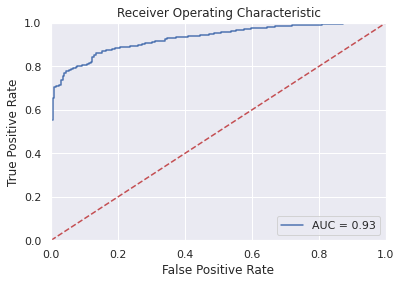

In [59]:
# Calculate the fpr and tpr for all thresholds of the classification
model = XGBClass
probs = model.predict_proba(X_test)
preds = probs[:,1]
fpr, tpr, threshold = metrics.roc_curve(y_test, preds)
roc_auc = metrics.auc(fpr, tpr)

# Method I: plt
    
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.savefig("../reports/figures/ROC_XGBClassifier.png")
plt.show()

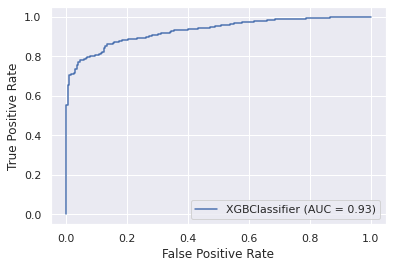

In [60]:
metrics.plot_roc_curve(model, X_test, y_test) 
plt.savefig("../reports/figures/ROC_XGBClassifier_b.png")
plt.show()

### RandomForestClassifier

RandomForestClassifier()

Accuracy : 0.8946824987093444
B-Accuracy :0.5432057204220431
ROC - AUC : 0.5432057204220431
F1 Score : 0.9438016528925621
Precision : 0.9034810126582279
Recall : 0.9878892733564014

[[0.09852217 0.90147783]
 [0.01211073 0.98788927]]



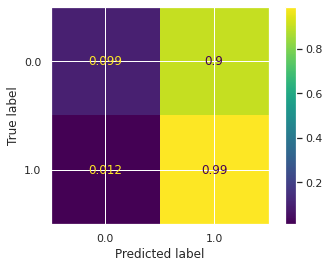

In [61]:
RandomForest_Score = analize_models(RandomForest, 'RandomForestClassifier', X_train, X_test, y_train, y_test)

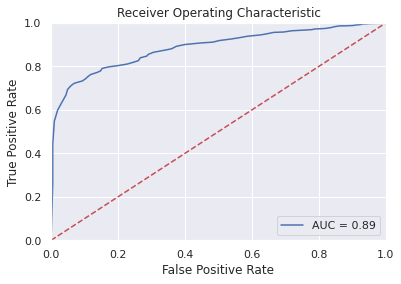

In [62]:
# Calculate the fpr and tpr for all thresholds of the classification
model = RandomForest
probs = model.predict_proba(X_test)
preds = probs[:,1]
fpr, tpr, threshold = metrics.roc_curve(y_test, preds)
roc_auc = metrics.auc(fpr, tpr)

# Method I: plt
    
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.savefig("../reports/figures/ROC_%s.png" % model)
plt.show()

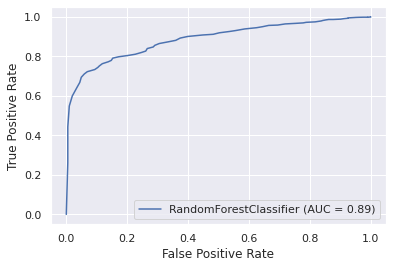

In [63]:
metrics.plot_roc_curve(model, X_test, y_test)  
plt.savefig("../reports/figures/ROC_%s_b.png" % model)
plt.show()

### LogisticRegression

LogisticRegression()

Accuracy : 0.9008776458440888
B-Accuracy :0.5553647422457827
ROC - AUC : 0.5553647422457827
F1 Score : 0.9471656576774905
Precision : 0.9057894736842105
Recall : 0.9925028835063437

[[0.1182266  0.8817734 ]
 [0.00749712 0.99250288]]



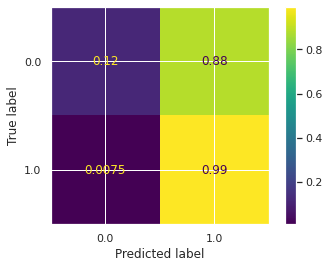

In [64]:
LogReg_Score = analize_models(LogReg, 'LogisticRegression' ,X_train, X_test, y_train, y_test)

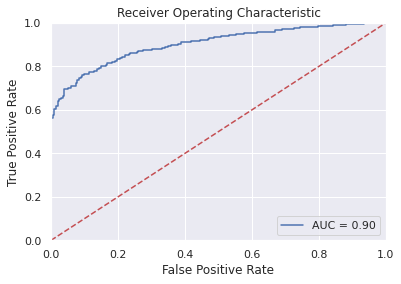

In [65]:
# Calculate the fpr and tpr for all thresholds of the classification
model = LogReg
probs = model.predict_proba(X_test)
preds = probs[:,1]
fpr, tpr, threshold = metrics.roc_curve(y_test, preds)
roc_auc = metrics.auc(fpr, tpr)

# Method I: plt
    
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.savefig("../reports/figures/ROC_%s.png" % model)
plt.show()

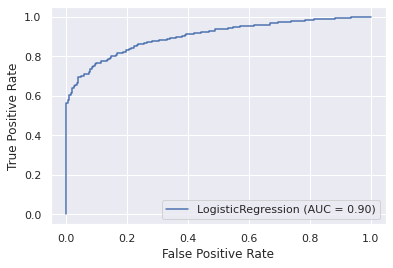

In [66]:
metrics.plot_roc_curve(model, X_test, y_test)
plt.savefig("../reports/figures/ROC_%s_b.png" % model)
plt.show()

### Decission Tree

DecisionTreeClassifier()

Accuracy : 0.8487351574599896
B-Accuracy :0.6284523951568457
ROC - AUC : 0.6284523951568457
F1 Score : 0.9148008141901716
Precision : 0.9225806451612903
Recall : 0.9071510957324106

[[0.34975369 0.65024631]
 [0.0928489  0.9071511 ]]



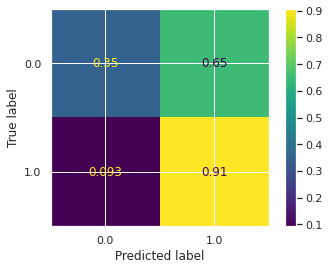

In [67]:
DecissionTree_Score  = analize_models(DecissionTree, 'DecisionTreeClassifier', X_train,X_test,y_train,y_test)

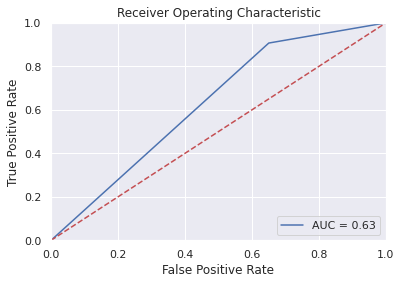

In [68]:
# Calculate the fpr and tpr for all thresholds of the classification
model = DecissionTree
probs = model.predict_proba(X_test)
preds = probs[:,1]
fpr, tpr, threshold = metrics.roc_curve(y_test, preds)
roc_auc = metrics.auc(fpr, tpr)

# Method I: plt
    
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.savefig("../reports/figures/ROC_%s.png" % model)
plt.show()

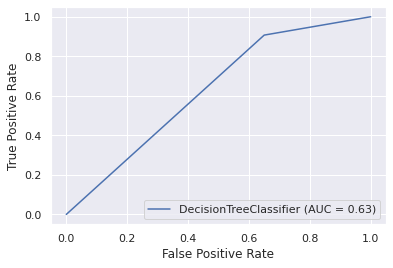

In [69]:
metrics.plot_roc_curve(model, X_test, y_test)
plt.savefig("../reports/figures/ROC_%s_b.png" % model)
plt.show()

## Summary of the Values Obtained by the Principal Classifier Models

In [70]:
scores = pd.DataFrame([XGBClass_Score, RandomForest_Score, LogReg_Score ,DecissionTree_Score]).set_index(keys='model')
scores

,Accuracy,B-Accuracy,Roc_AUC,F1 Score,Precision,Recall
model,,,,,,
XGBClassificier,0.91,0.68,0.68,0.95,0.93,0.98
RandomForestClassifier,0.89,0.54,0.54,0.94,0.90,0.99
LogisticRegression,0.90,0.56,0.56,0.95,0.91,0.99
DecisionTreeClassifier,0.85,0.63,0.63,0.91,0.92,0.91


************************************************************************
************************************************************************
************************************************************************

# AutoML Classifier

https://towardsdatascience.com/4-python-automl-libraries-every-data-scientist-should-know-680ff5d6ad08

### Although there is a library called auto-sklearn, which significantly simplifies the processes to be carried out, I have looked for a more structured method, to be able to visualize all the steps more clearly.

Build an AutoML library in Python, which will perform these actions automatically:

- Blank filling
- Encoding of categorical variables
- Scaling of numerical variables
- Feature selection
- Model selection
- Hyperparameter tuning

In [71]:
# AutoML Classifier

class AutoMLClassifier:
    
  def __init__(self, scoring_function = 'balanced_accuracy', n_iter = 50):
    self.scoring_function = scoring_function
    self.n_iter = n_iter

  # Build the "fit" method 
  def fit(self,X,y):
    X_train = X
    y_train = y

    categorical_values = []

    cat_subset = X_train.select_dtypes(include = ['object','category','bool'])

    for i in range(cat_subset.shape[1]):
      categorical_values.append(list(cat_subset.iloc[:,i].dropna().unique()))

    # Numerical Pipeline
    num_pipeline = Pipeline([
                         ('cleaner',SimpleImputer()),
                         ('scaler',StandardScaler())
                         ])

    # Categorical Pipeline
    cat_pipeline = Pipeline([
                        ('cleaner',SimpleImputer(strategy = 'most_frequent')),
                        ('encoder',OneHotEncoder(sparse = False, categories=categorical_values))
    ])

    # Preprocessing
    preprocessor = ColumnTransformer([
      ('numerical', num_pipeline, make_column_selector(dtype_exclude=['object','category','bool'])),
      ('categorical', cat_pipeline, make_column_selector(dtype_include=['object','category','bool']))
    ])


    # Define the ML pipeline
    # We set the model to LogisticRegression at this point; will be changed later by random search
    model_pipeline_steps = []
    model_pipeline_steps.append(('preprocessor',preprocessor))
    model_pipeline_steps.append(('feature_selector',SelectKBest(f_classif,k='all')))
    model_pipeline_steps.append(('estimator',LogisticRegression()))
    model_pipeline = Pipeline(model_pipeline_steps)

    # We calculate the number of characteristics
    total_features = preprocessor.fit_transform(X_train).shape[1]

    # Add models to our optimization grid
    optimization_grid = []

    # Logistic regression
    # Change the scale between RobustScaler, StandardScaler and MinMaxscaler
    # Then you will change the cleaning strategy between mean and median and select the characteristics
    optimization_grid.append({
        'preprocessor__numerical__scaler':[RobustScaler(),StandardScaler(),MinMaxScaler()],
        'preprocessor__numerical__cleaner__strategy':['mean','median'],
        'feature_selector__k': list(np.arange(1,total_features,5)) + ['all'],
        'estimator':[LogisticRegression()]
    })

    # Gradient boosting
    optimization_grid.append({
        'preprocessor__numerical__scaler':[None],
        'preprocessor__numerical__cleaner__strategy':['mean','median'],
        'feature_selector__k': list(np.arange(1,total_features,5)) + ['all'],
        'estimator':[GradientBoostingClassifier(random_state=0)],
        'estimator__n_estimators':np.arange(5,500,10),
        'estimator__learning_rate':np.linspace(0.1,0.9,20),
    })

    # Random Forest
    optimization_grid.append({
        'preprocessor__numerical__scaler':[None],
        'preprocessor__numerical__cleaner__strategy':['mean','median'],
        'feature_selector__k': list(np.arange(1,total_features,5)) + ['all'],
        'estimator':[RandomForestClassifier(random_state=0)],
        'estimator__n_estimators':np.arange(5,500,10),
        'estimator__criterion':['gini','entropy']
    })

    # Decision tree
    optimization_grid.append({
        'preprocessor__numerical__scaler':[None],
        'preprocessor__numerical__cleaner__strategy':['mean','median'],
        'feature_selector__k': list(np.arange(1,total_features,5)) + ['all'],
        'estimator':[DecisionTreeClassifier(random_state=0)],
        'estimator__criterion':['gini','entropy']
    })

    # K-nearest neighbors
    optimization_grid.append({
        'preprocessor__numerical__scaler':[RobustScaler(),StandardScaler(),MinMaxScaler()],
        'preprocessor__numerical__cleaner__strategy':['mean','median'],
        'feature_selector__k': list(np.arange(1,total_features,5)) + ['all'],
        'estimator':[KNeighborsClassifier()],
        'estimator__weights':['uniform','distance'],
        'estimator__n_neighbors':np.arange(1,20,1)
    })

    # Linear SVM
    optimization_grid.append({
        'preprocessor__numerical__scaler':[RobustScaler(),StandardScaler(),MinMaxScaler()],
        'preprocessor__numerical__cleaner__strategy':['mean','median'],
        'feature_selector__k': list(np.arange(1,total_features,5)) + ['all'],
        'estimator':[LinearSVC(random_state = 0)],
        'estimator__C': np.arange(0.1,1,0.1),
        
    })

    # Random search applies
    search = RandomizedSearchCV(
      model_pipeline,
      optimization_grid,
      n_iter = self.n_iter,
      scoring = self.scoring_function, 
      n_jobs = -1, 
      random_state = 6858, 
      verbose = 3,
      cv = 5
    )

    search.fit(X_train, y_train)
    self.best_estimator_ = search.best_estimator_
    self.best_pipeline = search.best_params_
    

  # Prediction methods
  def predict(self,X,y = None):
    return self.best_estimator_.predict(X)

  def predict_proba(self,X,y = None):
    return self.best_estimator_.predict_proba(X)

## Analize AutoML Classifier Function

In [72]:
def Analize_AutoML(model, name, X_test, y_test):
    
    
    conf_matrix = confusion_matrix(y_test,model.predict(X_test),normalize='true')

    scores = {'model': str(name),
            'Accuracy':accuracy_score(y_test, model.predict(X_test)),
            'B-Accuracy':balanced_accuracy_score(y_test, model.predict(X_test)),
            'Roc_AUC':roc_auc_score(y_test, model.predict(X_test)),
            'F1 Score':f1_score(y_test, model.predict(X_test)),
            'Precision':precision_score(y_test, model.predict(X_test)),
            'Recall':recall_score(y_test,model.predict(X_test))}

    print(model)
    print('')
    print(f'Accuracy : {accuracy_score(y_test, model.predict(X_test))}')
    print(f'B-Accuracy :{balanced_accuracy_score(y_test,model.predict(X_test))}')
    print(f'ROC - AUC : {roc_auc_score(y_test,model.predict(X_test))}')
    print(f'F1 Score : {f1_score(y_test,model.predict(X_test))}')
    print(f'Precision : {precision_score(y_test,model.predict(X_test))}')
    print(f'Recall : {recall_score(y_test,model.predict(X_test))}')
    print('')
    print(conf_matrix)
    print('')

    #plot_confusion_matrix(model, X_test, y_test, normalize='true')

    return scores

## AutoML Instance Function

In [73]:
def AutoML_Models():
    
    model = AutoMLClassifier()
    model.fit(X_train,y_train)
    
    return model

## Divide the data set into training set and test set

In [74]:
df = pd.read_csv(path + 'processed/DelayedFlightsProcessed.csv')

In [75]:
# Matrix
X = df.drop(['Target'], axis = 'columns')
# Vector
y = df['Target']

In [76]:
# Call train_test_split on the data and capture the results
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 6858)

## Instance Model

In [77]:
model2 = AutoML_Models()

Fitting 5 folds for each of 50 candidates, totalling 250 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  16 tasks      | elapsed:   10.4s
[Parallel(n_jobs=-1)]: Done 112 tasks      | elapsed:   31.6s
[Parallel(n_jobs=-1)]: Done 250 out of 250 | elapsed:  1.5min finished


## Analize Model

In [78]:
scores2 = Analize_AutoML(model2, 'AutoMLClassifier', X_test, y_test)


Accuracy : 0.9215281362932369
B-Accuracy :0.712603905659627
ROC - AUC : 0.712603905659627
F1 Score : 0.9570621468926553
Precision : 0.937984496124031
Recall : 0.9769319492502884

[[0.44827586 0.55172414]
 [0.02306805 0.97693195]]



## See which model and pre-processing parameters have been selected

In [79]:
Best_Pipeline2 = model2.best_pipeline
Best_Pipeline2

{'preprocessor__numerical__scaler': None,
 'preprocessor__numerical__cleaner__strategy': 'mean',
 'feature_selector__k': 11,
 'estimator__n_estimators': 435,
 'estimator__learning_rate': 0.5631578947368421,
 'estimator': GradientBoostingClassifier(learning_rate=0.5631578947368421, n_estimators=435,
                            random_state=0)}

************************************************************************
************************************************************************
************************************************************************

# Do not use the DepDelay variable when making predictions

In [80]:
df = pd.read_csv(path + 'processed/DelayedFlightsProcessed.csv')

## Divide the data set into training set and test set

In [81]:
# Matrix
X = df.drop(['Target', 'DepDelay'], axis = 'columns')
# Vector
y = df['Target']

In [82]:
# Call train_test_split on the data and capture the results
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 6858)

In [83]:
model3 = AutoML_Models()

Fitting 5 folds for each of 50 candidates, totalling 250 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  16 tasks      | elapsed:    9.6s
[Parallel(n_jobs=-1)]: Done 112 tasks      | elapsed:   33.0s
[Parallel(n_jobs=-1)]: Done 250 out of 250 | elapsed:  1.5min finished


In [84]:
scores3 = Analize_AutoML(model3, 'AutoML Without DepDelay',X_test, y_test)


Accuracy : 0.935467217346412
B-Accuracy :0.7486605189743241
ROC - AUC : 0.748660518974324
F1 Score : 0.96469923750353
Precision : 0.945213060320974
Recall : 0.9850057670126874

[[0.51231527 0.48768473]
 [0.01499423 0.98500577]]



In [85]:
Best_Pipeline3 = model3.best_pipeline
Best_Pipeline3

{'preprocessor__numerical__scaler': None,
 'preprocessor__numerical__cleaner__strategy': 'mean',
 'feature_selector__k': 11,
 'estimator__n_estimators': 485,
 'estimator__learning_rate': 0.31052631578947365,
 'estimator': GradientBoostingClassifier(learning_rate=0.31052631578947365, n_estimators=485,
                            random_state=0)}

# Summary of the values obtained by the models

In [86]:
scores1 = pd.DataFrame([scores2, scores3]).set_index(keys='model')

In [87]:
summary = pd.concat([scores,scores1])

In [88]:
summary

,Accuracy,B-Accuracy,Roc_AUC,F1 Score,Precision,Recall
model,,,,,,
XGBClassificier,0.91,0.68,0.68,0.95,0.93,0.98
RandomForestClassifier,0.89,0.54,0.54,0.94,0.90,0.99
LogisticRegression,0.90,0.56,0.56,0.95,0.91,0.99
DecisionTreeClassifier,0.85,0.63,0.63,0.91,0.92,0.91
AutoMLClassifier,0.92,0.71,0.71,0.96,0.94,0.98
AutoML Without DepDelay,0.94,0.75,0.75,0.96,0.95,0.99


### We cannot observe that when eliminating the variable DepDelay from the equation, the results change significantly, despite being a strongly correlated variable